# <center>Titanic Data Analysis</center>
The pipeline consists of several steps:
1. Exploratory Data Analysis (EDA) - understanding the data and the underlying interactions between the different variables
2. Data Pre-processing - preparing the data for modelling
3. Building the model
4. Evaluating the performance of the model, and possibly fine-tune and tweak it if necessary

The goal of the model is to predict whether a passenger survived the Titanic disaster, given their age, class and a few other features.



# Loading Libraries

Numpy is requried whenever calculations are required (calculating means, medians, sqaure root, etc.).
pandas is a great module for data processing and data frames. 
Matplotlib and seaborn for data visualization


We can choose alias names to our modules for the sake of convenience (numpy --> np, pandas --> pd)

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra 

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


import warnings

In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The sav

# Loading the data
We would use the pandas module to read the files. using the "read_csv" function. the files format is.csv (similar to .xls)

In the round brackets we have the path to where the data is saves.

In [2]:
df = pd.read_csv("titanic_data.csv")

Now, let's examine our dataframe:

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The "head" function displays the first 5 rows of the data frame. 

Let us explore the columns: 
* PassengerId - this is a just a generated Id
* Pclass - which class did the passenger ride - first, second or third
* Name - self explanatory
* Sex - male or female
* Age
* SibSp - were the passenger's spouse or siblings  with them on the ship
* Parch -  were the passenger's parents or children  with them on the ship
* Ticket - ticket number
* Fare - ticker price
* Cabin
* Embarked - port of embarkation
* Survived - did the passenger  survive the sinking of the Titanic?

**Note:** The whole goal is building a model that would predict the survival probability of a person, given their basic features.

In [4]:
df.shape # Let's check the shape of data

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The "info" function displays the information about the dataset such as

* Column name
* Data type of column
* Number of records

## Exploratory Data Analysis (EDA) - 
understanding the data and the underlying interactions between the different variables

Before treatment of null values let's understant the data

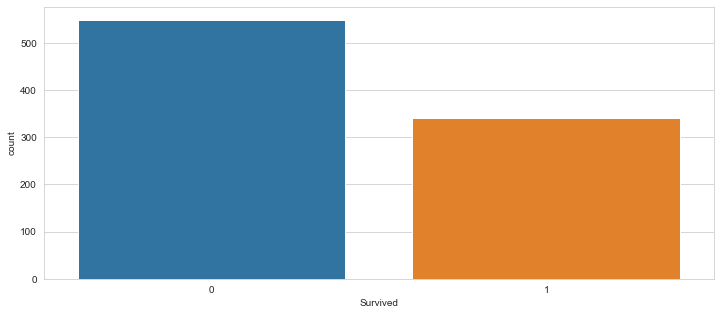

In [6]:
plt.rcParams["figure.figsize"] = (12,5)
sns.set_style("whitegrid")
sns.countplot(df["Survived"])
plt.show()

From this countplot we can say that out of 891 only 342 passenger survived

### Let's see male and female how survived or not

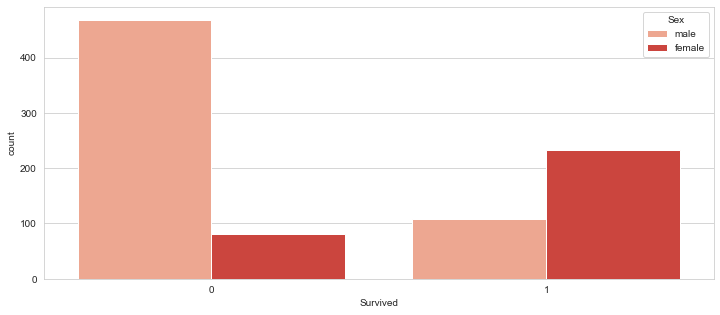

In [7]:
sns.set_style("whitegrid")
sns.countplot(df["Survived"] , hue=df["Sex"], palette="Reds")
plt.show()

In [8]:
print('% of men who survived', 100*np.mean(df['Survived'][df['Sex'] == 'male']))
print('% of women who survived', 100*np.mean(df['Survived'][df['Sex'] == 'female']))

% of men who survived 18.890814558058924
% of women who survived 74.20382165605095


From this we can analys that the ratio of female survived compare to male is more. Female had more chance to safe.

### Now see how Passenger class will effect on survied

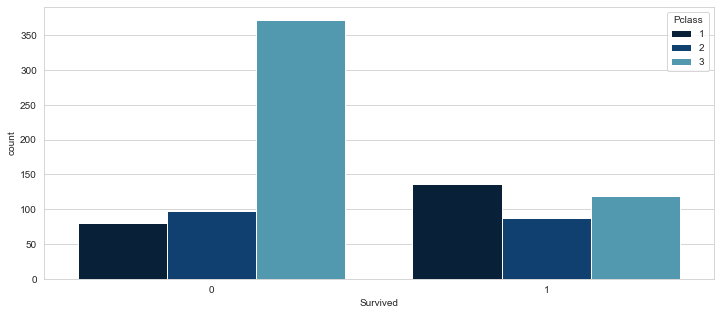

In [9]:
sns.set_style("whitegrid")
sns.countplot(df["Survived"] , hue=df["Pclass"], palette="ocean")
plt.show()

from this we can analys that rich class had high chance to survived compare to middle and low class people

### Let's see distribution of age

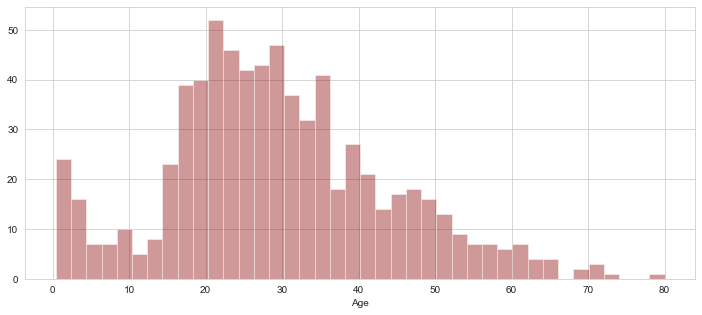

In [10]:
sns.distplot(df["Age"].dropna(), kde=False, bins=40, color="darkred")
plt.show()

### were the passenger's spouse or siblings with them on the ship

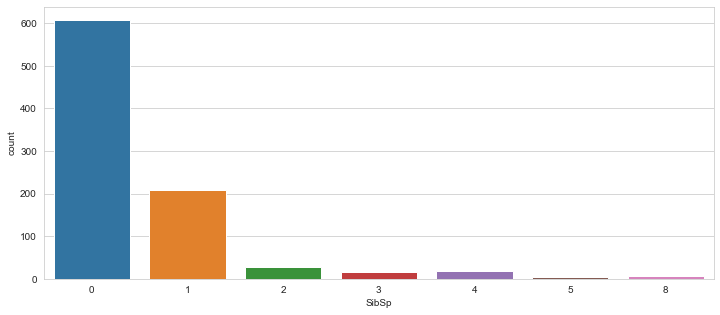

In [11]:
sns.countplot(df["SibSp"])
plt.show()

### Is passenger class has corelartion with age

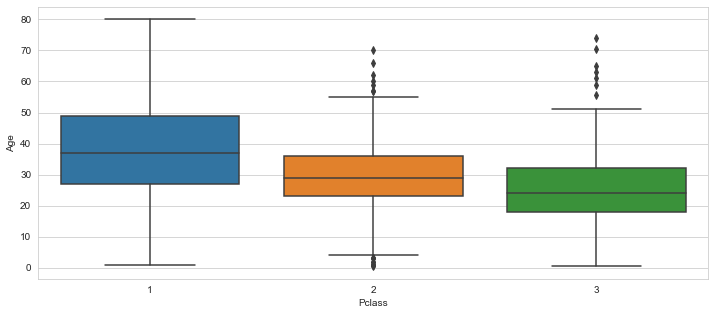

In [12]:
sns.boxplot(x = df["Pclass"], y = df["Age"])
plt.show()

## Missing Values
Another common problem which has to be addressed is missing values. We can simply delete rows with missing values, but usually we would 'want to take advantage of as many data points as possible. Replacing missing values with zeros would not be a good idea - as age 0 or price 0 have actual meanings and that would change our data.

Therefore a good replacement value would be something that doesn't affect the data too much, such as the median or mean. the "fillna" function replaces every NaN (not a number) entry with the given input (the mean of the column in our case):

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

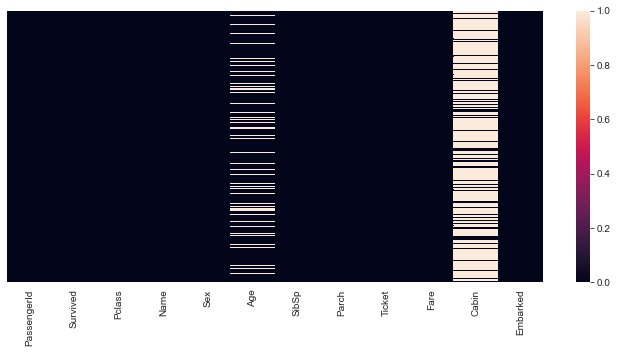

In [14]:
plt.rcParams['figure.figsize'] = (12,5)
sns.heatmap(df.isnull(), yticklabels=False)
plt.show()

from we can see that average age of class 1 : 37(approx), class 2 : 29(approx) and class 3 : 24(approx)

### Let's treatment of age column null value

In [15]:
def impute_age(col):
    age = col[0]
    pclass = col[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        elif pclass == 3:
            return 24
    else:
        return age

In [16]:
df["Age"] = df[["Age", "Pclass"]].apply(impute_age, axis = 1)

### Embarked is a categorical column so we can simply fill nan with most occurent i.e "S"

In [17]:
df["Embarked"].fillna("S", inplace =True)

### In Cabin column 687 out of 891 are missing value so we can simply drop the column

In [18]:
df.Cabin.isnull().sum()

687

In [19]:
df.drop("Cabin",axis=1, inplace= True )

# Data Pre-processing

### Non numeric features to numeric

We are going to use a decision tree model. The model requires only numeric values, but one of our features is categorical: "female" or "male". this can easily be fixed by encoding this feature: "male" = 1, "female" = 0

In [20]:
embarked = pd.get_dummies(df["Embarked"])
sex = pd.get_dummies(df["Sex"])

### Omit irrelevant columns
Let us only take the columns we find relevant. ID columns are never relevant (or at least should not be, if the data was sampled randomly). As our model is very simple, let us also omit the Ticket number, Cabin, ID and Name although more sophisticated models can definitely take advantage of them

In [21]:
df.drop(["Embarked","Sex","PassengerId","Name","Ticket"], axis = 1, inplace = True)

In [22]:
df = pd.concat([df, sex, embarked], axis = 1)

In [23]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


# Train and Test Split

We have our training data, and we have our test data. but in order to evaluate our model we need to split the training dataset into a train dataset and an evaluation dataset (validation). The validation data would be used to evaluate the model, while the training data would be used to train the data. 

To do that, we can use the function "train_test_split" from the sklearn module. the sklean module is probably the most commonly used library in most simple machine learning tasks (this does not include deep learning where other libraries can be more popular)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(df.drop("Survived", axis = 1), df["Survived"], test_size=0.30, random_state=101)

## Building ML Model
Now we are finally ready, and we can train the model.

First, we need to import our model - A decision tree classifier (again, using the sklearn library).

Then we would feed the model both with the data (X_train) and the answers for that data (y_train)

In [25]:
model = LogisticRegression()

In [26]:
model.fit(x_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [27]:
pred = model.predict(x_test)

## Evaluate the model
Now we have a model. Let's evaulate it with using the accuracy_score function. This output of the function is the number of right answers (passengers survival/death was predicted correctly) divided by the total number of passengers 

In [28]:
from sklearn.metrics import accuracy_score
print('Training accuracy...', accuracy_score(y_train, model.predict(x_train)))
print('Test accuracy', accuracy_score(y_test, model.predict(x_test)))

Training accuracy... 0.8202247191011236
Test accuracy 0.7873134328358209
